In [27]:
import sys
!{sys.executable} -m pip install pandas openpyxl matplotlib numpy

In [28]:
import pandas as pd
import numpy as np

# RUTAS (ajusta si cambian)
path_ind_2005 = r"C:\Users\gasto\Desktop\Taller de Programación\TP1\Individual_t105.dta"
path_ind_2025 = r"C:\Users\gasto\Desktop\Taller de Programación\TP1\usu_individual_T125.xlsx"
path_hog_2005 = r"C:\Users\gasto\Desktop\Taller de Programación\TP1\Hogar_t105.dta"
path_hog_2025 = r"C:\Users\gasto\Desktop\Taller de Programación\TP1\usu_hogar_T125.xlsx"

# (Parte III) Tabla de adulto equivalente
path_ae = r"C:\Users\gasto\Desktop\Taller de Programación\TP1\tabla_adulto_equiv.xlsx"

In [29]:
# INDIVIDUALES
ind_2005 = pd.read_stata(path_ind_2005, convert_categoricals=False)
ind_2025 = pd.read_excel(path_ind_2025, engine="openpyxl")

# HOGARES
hog_2005 = pd.read_stata(path_hog_2005, convert_categoricals=False)
hog_2025 = pd.read_excel(path_hog_2025, engine="openpyxl")

print("Individuales 2005:", ind_2005.shape, " | 2025:", ind_2025.shape)
print("Hogares      2005:", hog_2005.shape, " | 2025:", hog_2025.shape)

display(ind_2005.head())
display(ind_2025.head())

Individuales 2005: (47030, 176)  | 2025: (45425, 235)
Hogares      2005: (13597, 88)  | 2025: (15984, 98)


,CODUSU,nro_hogar,componente,h15,ano4,trimestre,region,mas_500,aglomerado,pondera,...,deccfr,ideccfr,rdeccfr,gdeccfr,pdeccfr,adeccfr,pj1_1,pj2_1,pj3_1,idimpp
0,125098,1.0,1.0,1.0,2005.0,1.0,1.0,S,32.0,1017.0,...,08,,07,08,,05,0.0,0.0,0.0,00000
1,125188,1.0,1.0,1.0,2005.0,1.0,1.0,S,32.0,1062.0,...,02,,02,02,,01,0.0,0.0,0.0,40020
2,125188,1.0,2.0,1.0,2005.0,1.0,1.0,S,32.0,1062.0,...,02,,02,02,,01,0.0,0.0,0.0,00000
3,125188,1.0,3.0,0.0,2005.0,1.0,1.0,S,32.0,1062.0,...,02,,02,02,,01,0.0,0.0,0.0,00000
4,125242,1.0,1.0,1.0,2005.0,1.0,1.0,S,32.0,1103.0,...,09,,09,09,,07,0.0,0.0,0.0,00000


,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,COMPONENTE,H15,REGION,MAS_500,AGLOMERADO,PONDERA,...,V21_03_M,V22_01_M,V22_02_M,V22_03_M,P_DECCF,P_RDECCF,P_GDECCF,P_PDECCF,P_IDECCF,P_ADECCF
0,TQRMNOVQVHJOLOCDEFKID00875778,2025,1,1,2,1,43,S,4,927,...,0,0,0,0,3.0,2.0,3.0,NaN,3.0,2.0
1,TQRMNOVQVHJOLOCDEFKID00875778,2025,1,1,3,0,43,S,4,927,...,0,0,0,0,3.0,2.0,3.0,NaN,3.0,2.0
2,TQRMNOVQVHJOLOCDEFKID00875778,2025,1,1,4,0,43,S,4,927,...,0,0,0,0,3.0,2.0,3.0,NaN,3.0,2.0
3,TQRMNOVQVHJOLOCDEFKID00875778,2025,1,1,5,0,43,S,4,927,...,0,0,0,0,3.0,2.0,3.0,NaN,3.0,2.0
4,TQRMNOUPQHLOLOCDEFKID00851757,2025,1,1,1,1,43,S,4,1294,...,0,0,0,0,3.0,3.0,3.0,NaN,3.0,3.0


In [30]:
def normalize_cols(df):
    df.columns = df.columns.str.upper().str.strip()
    return df

for df in [ind_2005, ind_2025, hog_2005, hog_2025]:
    normalize_cols(df)

# Ver columnas clave (debe tener CODUSU, NRO_HOGAR, REGION)
for name, df in [("IND 2005", ind_2005), ("IND 2025", ind_2025), ("HOG 2005", hog_2005), ("HOG 2025", hog_2025)]:
    missing = [c for c in ("CODUSU","NRO_HOGAR","REGION") if c not in df.columns]
    if missing:
        raise KeyError(f"{name}: faltan columnas {missing}")

print("OK columnas clave.")

OK columnas clave.


In [31]:
def filtrar_patagonia(df, anio):
    if pd.api.types.is_numeric_dtype(df["REGION"]):
        mask = df["REGION"].isin([44, 6])  # 44 oficial; 6: fallback histórico en algunos extractos
    else:
        mask = df["REGION"].astype(str).str.upper().str.contains("PATAG", na=False)
    out = df.loc[mask].copy()
    out["ANIO"] = anio
    out["TRIMESTRE"] = 1
    return out

ind_2005_r = filtrar_patagonia(ind_2005, 2005)
ind_2025_r = filtrar_patagonia(ind_2025, 2025)
hog_2005_r = filtrar_patagonia(hog_2005, 2005)
hog_2025_r = filtrar_patagonia(hog_2025, 2025)

print("Filas Patagonia 2005 - IND:", ind_2005_r.shape, " | HOG:", hog_2005_r.shape)
print("Filas Patagonia 2025 - IND:", ind_2025_r.shape, " | HOG:", hog_2025_r.shape)

Filas Patagonia 2005 - IND: (3229, 177)  | HOG: (950, 89)
Filas Patagonia 2025 - IND: (5359, 236)  | HOG: (2086, 99)


In [32]:
# Claves como string (evita mismatches)
for d in (ind_2005_r, ind_2025_r, hog_2005_r, hog_2025_r):
    d["CODUSU"] = d["CODUSU"].astype(str).str.strip()
    d["NRO_HOGAR"] = d["NRO_HOGAR"].astype(str).str.strip()
    d["ID_HOGAR"] = d["CODUSU"] + "_" + d["NRO_HOGAR"]

# Join IND ← HOG (left) por claves
m_2005 = ind_2005_r.merge(hog_2005_r, on=["CODUSU","NRO_HOGAR"], how="left", suffixes=("", "_HOG"))
m_2025 = ind_2025_r.merge(hog_2025_r, on=["CODUSU","NRO_HOGAR"], how="left", suffixes=("", "_HOG"))

# Renombrar IV1/IV2/IV6 si quedaron con sufijo
for col in ["IV1","IV2","IV6"]:
    if col not in m_2005.columns and f"{col}_HOG" in m_2005.columns:
        m_2005.rename(columns={f"{col}_HOG": col}, inplace=True)
    if col not in m_2025.columns and f"{col}_HOG" in m_2025.columns:
        m_2025.rename(columns={f"{col}_HOG": col}, inplace=True)

print("Unidos 2005:", m_2005.shape, " | Unidos 2025:", m_2025.shape)

Unidos 2005: (3229, 266)  | Unidos 2025: (5359, 335)


In [33]:
# Claves como string (evita mismatches)
for d in (ind_2005_r, ind_2025_r, hog_2005_r, hog_2025_r):
    d["CODUSU"] = d["CODUSU"].astype(str).str.strip()
    d["NRO_HOGAR"] = d["NRO_HOGAR"].astype(str).str.strip()
    d["ID_HOGAR"] = d["CODUSU"] + "_" + d["NRO_HOGAR"]

# Join IND ← HOG (left) por claves
m_2005 = ind_2005_r.merge(hog_2005_r, on=["CODUSU","NRO_HOGAR"], how="left", suffixes=("", "_HOG"))
m_2025 = ind_2025_r.merge(hog_2025_r, on=["CODUSU","NRO_HOGAR"], how="left", suffixes=("", "_HOG"))

# Renombrar IV1/IV2/IV6 si quedaron con sufijo
for col in ["IV1","IV2","IV6"]:
    if col not in m_2005.columns and f"{col}_HOG" in m_2005.columns:
        m_2005.rename(columns={f"{col}_HOG": col}, inplace=True)
    if col not in m_2025.columns and f"{col}_HOG" in m_2025.columns:
        m_2025.rename(columns={f"{col}_HOG": col}, inplace=True)

print("Unidos 2005:", m_2005.shape, " | Unidos 2025:", m_2025.shape)

Unidos 2005: (3229, 266)  | Unidos 2025: (5359, 335)


In [35]:
clean = base15.copy()

num_vars = [v for v in clean.columns if pd.api.types.is_numeric_dtype(clean[v])]
print("Variables numéricas:", num_vars)

for v in num_vars:
    clean[v] = pd.to_numeric(clean[v], errors="coerce")
    clean.loc[clean[v] < 0, v] = np.nan
    clean.loc[clean[v].isin([99, 999, 9999, 999999]), v] = np.nan

negativos = {v: (clean[v] < 0).sum() for v in num_vars if (clean[v] < 0).any()}
print("Variables con negativos remanentes:", negativos)

faltantes_post = (clean.isna().mean() * 100).round(2)
display(faltantes_post.to_frame("Faltantes post-limpieza (%)").T)

print("Filas antes:", base15.shape[0], "| después:", clean.shape[0])

# Guardado (opcional)
# clean.to_csv(r"C:\Users\gasto\Desktop\Taller de Programación\TP1\base15_limpia.csv", index=False)

Variables numéricas: ['ANIO', 'TRIMESTRE', 'IPCF', 'PONDERA']
Variables con negativos remanentes: {}


,CODUSU,ANIO,TRIMESTRE,CH04,CH06,CH07,CH08,NIVEL_ED,ESTADO,CAT_INAC,IPCF,PONDERA,IV1,IV2,IV6
Faltantes post-limpieza (%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.61,0.0,0.0,0.0


Filas antes: 8588 | después: 8588


In [55]:
#PARTE III
base = base.copy()  # por las dudas

base["ESTADO"] = pd.to_numeric(base.get("ESTADO"), errors="coerce")
base["ITF"] = pd.to_numeric(base.get("ITF"), errors="coerce")  # puede venir desde hogares

mask_noestado = base["ESTADO"].isna() | ~base["ESTADO"].isin([1,2,3])
cant_noestado = mask_noestado.sum()
cant_total = len(base)
print(f"No respondieron ESTADO: {cant_noestado} de {cant_total} ({cant_noestado/cant_total:.2%})")

respondieron = base.loc[(base["ITF"].notna()) & (base["ITF"] > 0)].copy()
norespondieron = base.loc[(base["ITF"].notna()) & (base["ITF"] == 0)].copy()

print("respondieron (ITF>0):", respondieron.shape)
print("norespondieron (ITF=0):", norespondieron.shape)

No respondieron ESTADO: 3789 de 8588 (44.12%)
respondieron (ITF>0): (7363, 251)
norespondieron (ITF=0): (1225, 251)


In [56]:
# ==== PASO 1: Diagnóstico de variables clave en RESPONDIERON ====

print("Columnas disponibles en 'respondieron':")
print(sorted(respondieron.columns.tolist())[:40], "...")  # muestra primeras 40 para no saturar

# ¿tenemos CH04, CH06 y COMPONENTE?
needed = ["CH04", "CH06", "COMPONENTE", "ANIO", "CODUSU", "NRO_HOGAR", "ITF"]
missing = [c for c in needed if c not in respondieron.columns]
print("\nFaltan estas columnas clave:", missing)

# Conteo de faltantes por año para CH04/CH06 (si existen)
if all(c in respondieron.columns for c in ["ANIO", "CH04", "CH06"]):
    diag = (
        respondieron
        .groupby("ANIO")[["CH04","CH06"]]
        .apply(lambda d: d.isna().sum())
        .rename(columns={"CH04":"CH04_na", "CH06":"CH06_na"})
    )
    print("\nFaltantes CH04/CH06 por año:")
    print(diag)

# Tamaños por año de la base 'respondieron'
print("\nFilas en 'respondieron' por año:")
print(respondieron["ANIO"].value_counts(dropna=False).sort_index())


Columnas disponibles en 'respondieron':
['ADECCFR', 'ADECCFR_HOG', 'ADECIFR', 'ADECIFR_HOG', 'ADECINDR', 'ADECOCUR', 'AGLOMERADO', 'AGLOMERADO_HOG', 'ANIO', 'ANIO_HOG', 'ANO4', 'ANO4_HOG', 'CAT_INAC', 'CAT_OCUP', 'CH03', 'CH04', 'CH06', 'CH07', 'CH08', 'CH09', 'CH10', 'CH11', 'CH12', 'CH13', 'CH14', 'CH15', 'CH15_COD', 'CH16', 'CH16_COD', 'CODUSU', 'COMPONENTE', 'DECCFR', 'DECCFR_HOG', 'DECIFR', 'DECIFR_HOG', 'DECINDR', 'DECOCUR', 'ESTADO', 'GDECCFR', 'GDECCFR_HOG'] ...

Faltan estas columnas clave: []

Faltantes CH04/CH06 por año:
      CH04_na  CH06_na
ANIO                  
2005        0        0
2025        0        0

Filas en 'respondieron' por año:
ANIO
2005    3206
2025    4157
Name: count, dtype: int64


In [57]:
# ==== PASO 2: Normalizar claves y reintentar el merge para 2005 ====

def _norm_keys(df):
    df = df.copy()
    df["CODUSU"] = df["CODUSU"].astype(str).str.strip()
    for c in ["NRO_HOGAR","COMPONENTE"]:
        df[c] = pd.to_numeric(df[c], errors="coerce").astype("Int64")  # enteros con NA seguro
    return df

# Normalizamos claves en ambos dataframes
aux05_norm  = _norm_keys(aux05)
resp05_norm = _norm_keys(respondieron.loc[respondieron["ANIO"]==2005])

# Diagnóstico de dtypes antes del merge
print("aux05 dtypes:\n", aux05_norm[["CODUSU","NRO_HOGAR","COMPONENTE"]].dtypes)
print("\nresp05 dtypes:\n", resp05_norm[["CODUSU","NRO_HOGAR","COMPONENTE"]].dtypes)

# Contar NaN previos
before_ch04_na = resp05_norm["CH04"].isna().sum()
before_ch06_na = resp05_norm["CH06"].isna().sum()

# Merge por claves ya armonizadas
resp05m = resp05_norm.merge(
    aux05_norm, on=["CODUSU","NRO_HOGAR","COMPONENTE"], how="left", suffixes=("","_AUX")
)

# Relleno CH04/CH06 con lo traído del individual
for col in ["CH04","CH06"]:
    if f"{col}_AUX" in resp05m.columns:
        resp05m[col] = pd.to_numeric(resp05m[col], errors="coerce")
        resp05m[f"{col}_AUX"] = pd.to_numeric(resp05m[f"{col}_AUX"], errors="coerce")
        resp05m[col] = resp05m[col].fillna(resp05m[f"{col}_AUX"])
        resp05m.drop(columns=[f"{col}_AUX"], inplace=True)

after_ch04_na = resp05m["CH04"].isna().sum()
after_ch06_na = resp05m["CH06"].isna().sum()

print(f"\nCH04 NaN 2005: antes={before_ch04_na} | después={after_ch04_na}")
print(f"CH06 NaN 2005: antes={before_ch06_na} | después={after_ch06_na}")

# Reinsertamos el 2005 corregido en 'respondieron'
respondieron = pd.concat(
    [resp05m, respondieron.loc[respondieron["ANIO"]!=2005]],
    ignore_index=True
)

# Vista rápida para verificar que ahora hay valores en CH04/CH06 (2005)
display(respondieron.loc[respondieron["ANIO"]==2005, 
         ["CODUSU","NRO_HOGAR","COMPONENTE","CH04","CH06"]].head(12))


aux05 dtypes:
 CODUSU        object
NRO_HOGAR      Int64
COMPONENTE     Int64
dtype: object

resp05 dtypes:
 CODUSU        object
NRO_HOGAR      Int64
COMPONENTE     Int64
dtype: object

CH04 NaN 2005: antes=0 | después=0
CH06 NaN 2005: antes=0 | después=0


,CODUSU,NRO_HOGAR,COMPONENTE,CH04,CH06
0,125814,1,1,1.0,46.0
1,125814,1,2,2.0,32.0
2,125814,1,3,1.0,14.0
3,125814,1,4,1.0,9.0
4,125814,1,5,2.0,3.0
5,125969,1,1,1.0,62.0
6,125969,1,2,2.0,59.0
7,126039,1,1,2.0,75.0
8,126757,1,1,1.0,39.0
9,126757,1,2,2.0,36.0


In [58]:
# ==== PASO 3: Adulto equivalente (AE) individual y por hogar ====

# 3.1) Cargar tabla AE (si no existe en memoria)
if 'ae_uniform' not in globals():
    # Ruta: ajusta si la tuya es distinta
    path_ae = r"C:\Users\gasto\Desktop\Taller de Programación\TP1\tabla_adulto_equiv.xlsx"
    ae_raw = pd.read_excel(path_ae)
    ae_raw.columns = [str(c).strip().upper() for c in ae_raw.columns]
    
    # Intento de formatos comunes
    if {"SEXO","EDAD","AE"}.issubset(ae_raw.columns):
        ae_uniform = ae_raw[["SEXO","EDAD","AE"]].copy()
        ae_uniform["EDAD_MIN"] = pd.to_numeric(ae_uniform["EDAD"], errors="coerce")
        ae_uniform["EDAD_MAX"] = pd.to_numeric(ae_uniform["EDAD"], errors="coerce")
        ae_uniform.drop(columns=["EDAD"], inplace=True)
    elif {"SEXO","EDAD_MIN","EDAD_MAX","AE"}.issubset(ae_raw.columns):
        ae_uniform = ae_raw[["SEXO","EDAD_MIN","EDAD_MAX","AE"]].copy()
    else:
        raise ValueError("No reconozco el formato del Excel de AE. Necesito columnas (SEXO, EDAD, AE) o (SEXO, EDAD_MIN, EDAD_MAX, AE).")

    # Normalizo tipos
    def _sex_to_code(x):
        s = str(x).strip().upper()
        if s in {"1","VARON","HOMBRE","MASCULINO","M"}: return 1
        if s in {"2","MUJER","FEMENINO","F"}: return 2
        try:
            v = int(float(s))
            if v in (1,2): return v
        except:
            pass
        return np.nan

    ae_uniform["SEXO"]     = ae_uniform["SEXO"].apply(_sex_to_code).astype("Int64")
    ae_uniform["EDAD_MIN"] = pd.to_numeric(ae_uniform["EDAD_MIN"], errors="coerce")
    ae_uniform["EDAD_MAX"] = pd.to_numeric(ae_uniform["EDAD_MAX"], errors="coerce")
    ae_uniform["AE"]       = pd.to_numeric(ae_uniform["AE"], errors="coerce")
    ae_uniform = ae_uniform.dropna(subset=["SEXO","EDAD_MIN","EDAD_MAX","AE"]).copy()

print("AE uniform shape:", ae_uniform.shape)

# 3.2) Asegurar CH04/CH06 numéricos en respondieron
respondieron["CH04"] = pd.to_numeric(respondieron["CH04"], errors="coerce")
respondieron["CH06"] = pd.to_numeric(respondieron["CH06"], errors="coerce")

# 3.3) Asignar AE individual por rango
respondieron["ADULTO_EQUIV"] = np.nan
for _, r in ae_uniform.iterrows():
    sel = (respondieron["CH04"] == r["SEXO"]) & (respondieron["CH06"].between(r["EDAD_MIN"], r["EDAD_MAX"]))
    respondieron.loc[sel, "ADULTO_EQUIV"] = r["AE"]

# 3.4) Sumar AE por hogar-año
ad_equiv = (
    respondieron.groupby(["CODUSU","NRO_HOGAR","ANIO"], as_index=False)["ADULTO_EQUIV"]
    .sum()
    .rename(columns={"ADULTO_EQUIV":"AD_EQUIV_HOGAR"})
)
respondieron = respondieron.drop(columns=["AD_EQUIV_HOGAR"], errors="ignore").merge(
    ad_equiv, on=["CODUSU","NRO_HOGAR","ANIO"], how="left"
)

# 3.5) Resumen de control
res_ae = respondieron.groupby("ANIO")["AD_EQUIV_HOGAR"].agg(["count","mean","median","min","max"])
print(res_ae)

display(
    respondieron.loc[respondieron["ANIO"]==2005, 
                     ["CODUSU","NRO_HOGAR","CH04","CH06","ADULTO_EQUIV","AD_EQUIV_HOGAR"]].head(10)
)
display(
    respondieron.loc[respondieron["ANIO"]==2025, 
                     ["CODUSU","NRO_HOGAR","CH04","CH06","ADULTO_EQUIV","AD_EQUIV_HOGAR"]].head(10)
)


AE uniform shape: (46, 4)
      count      mean  median  min    max
ANIO                                     
2005   3206  3.437265    3.29  0.0  10.25
2025   4157  2.648499    2.53  0.0   8.05


,CODUSU,NRO_HOGAR,CH04,CH06,ADULTO_EQUIV,AD_EQUIV_HOGAR
0,125814,1,1.0,46.0,0.76,3.72
1,125814,1,2.0,32.0,1.00,3.72
2,125814,1,1.0,14.0,0.76,3.72
3,125814,1,1.0,9.0,0.69,3.72
4,125814,1,2.0,3.0,0.51,3.72
5,125969,1,1.0,62.0,0.67,1.67
6,125969,1,2.0,59.0,1.00,1.67
7,126039,1,2.0,75.0,0.74,0.74
8,126757,1,1.0,39.0,0.77,4.33
9,126757,1,2.0,36.0,1.00,4.33


,CODUSU,NRO_HOGAR,CH04,CH06,ADULTO_EQUIV,AD_EQUIV_HOGAR
3206,TQRMNOQXRHMMKRCDEIHJF00877717,1,2.0,48.0,1.00,2.46
3207,TQRMNOQXRHMMKRCDEIHJF00877717,1,1.0,17.0,0.77,2.46
3208,TQRMNOQXRHMMKRCDEIHJF00877717,1,1.0,9.0,0.69,2.46
3209,TQRMNPQTPHLOKSCDEIHJF00854739,1,1.0,39.0,0.77,0.77
3210,TQRMNOPYQHLKKTCDEIHJF00854706,2,2.0,36.0,1.00,1.00
3211,TQRMNOPQTHJOKUCDEIHJF00875922,1,1.0,30.0,0.77,0.77
3212,TQRMNOTRTHKKKMCDEIHJF00860797,1,2.0,54.0,1.00,1.00
3213,TQRMNOSWTHLMKRCDEIHJF00860958,1,2.0,29.0,1.02,1.02
3214,TQRMNOPXYHLOKUCDEFPCH00852546,1,1.0,4.0,0.55,4.76
3215,TQRMNOPVUHMMLMCDEFPCH00877770,1,2.0,41.0,1.00,2.50


In [59]:
# ==== PASO 4: Ingreso necesario y variable pobre ====

# Definir CBT por año (valores de referencia)
cbt = {2005: 205.07, 2025: 365177}

# Crear columna de ingreso necesario
respondieron["ingreso_necesario"] = respondieron["ANIO"].map(cbt) * respondieron["AD_EQUIV_HOGAR"]

# Crear columna pobre
respondieron["pobre"] = np.where(
    respondieron["ITF"] < respondieron["ingreso_necesario"], 1, 0
)

# Resumen de pobreza
res_pobreza = (
    respondieron.groupby("ANIO")
    .agg(Total=("pobre", "count"), Pobres=("pobre", "sum"))
    .assign(Pct_Pobres=lambda d: 100 * d["Pobres"] / d["Total"])
)
print(res_pobreza)

# Vista previa de columnas clave
display(respondieron.loc[:, ["CODUSU","ANIO","ITF","AD_EQUIV_HOGAR","ingreso_necesario","pobre"]].head(10))


      Total  Pobres  Pct_Pobres
ANIO                           
2005   3206     590   18.402994
2025   4157     876   21.072889


,CODUSU,ANIO,ITF,AD_EQUIV_HOGAR,ingreso_necesario,pobre
0,125814,2005,2400.0,3.72,762.8604,0
1,125814,2005,2400.0,3.72,762.8604,0
2,125814,2005,2400.0,3.72,762.8604,0
3,125814,2005,2400.0,3.72,762.8604,0
4,125814,2005,2400.0,3.72,762.8604,0
5,125969,2005,300.0,1.67,342.4669,1
6,125969,2005,300.0,1.67,342.4669,1
7,126039,2005,830.0,0.74,151.7518,0
8,126757,2005,700.0,4.33,887.9531,1
9,126757,2005,700.0,4.33,887.9531,1


In [60]:
# ==== PASO Estadísticas descriptivas ====

# Agrupar por año y condición de pobreza
desc_pobre = (
    respondieron.groupby(["ANIO", "pobre"])
    .agg(
        Prom_ITF=("ITF", "mean"),
        Med_ITF=("ITF", "median"),
        Prom_AdultEq=("AD_EQUIV_HOGAR", "mean"),
        N=("ITF", "count")
    )
    .reset_index()
)
desc_pobre["pobre"] = desc_pobre["pobre"].map({0:"No pobres", 1:"Pobres"})
display(desc_pobre)

# También porcentaje de pobres por año
pobreza_por_anio = (
    respondieron.groupby("ANIO")["pobre"].mean().mul(100).reset_index(name="% Pobres")
)
display(pobreza_por_anio)


,ANIO,pobre,Prom_ITF,Med_ITF,Prom_AdultEq,N
0,2005,No pobres,2.364899e+03,2000.0,3.193811,2616
1,2005,Pobres,5.649746e+02,500.0,4.516712,590
2,2025,No pobres,2.304870e+06,1950000.0,2.397144,3281
3,2025,Pobres,8.519049e+05,826500.0,3.589932,876


,ANIO,% Pobres
0,2005,18.402994
1,2025,21.072889


In [63]:
import sys
!{sys.executable} -m pip install seaborn matplotlib

C:\Users\gasto\AppData\Local\Temp\ipykernel_8940\2399697167.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=pobreza_por_anio, x="ANIO", y="% Pobres", palette="magma")


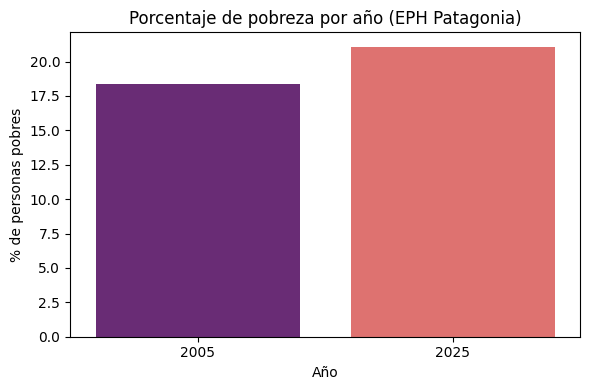

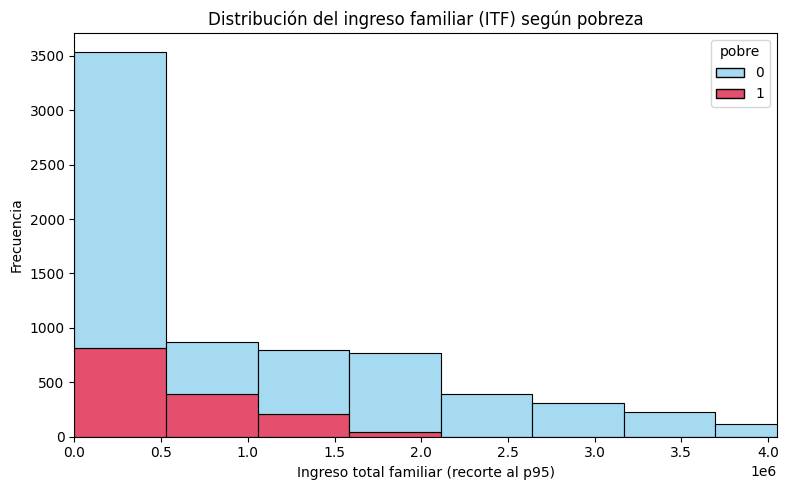

In [64]:
# ==== PASO Gráficos ====

import seaborn as sns
import matplotlib.pyplot as plt

# 1) Barra: % de pobreza por año
plt.figure(figsize=(6,4))
sns.barplot(data=pobreza_por_anio, x="ANIO", y="% Pobres", palette="magma")
plt.title("Porcentaje de pobreza por año (EPH Patagonia)")
plt.ylabel("% de personas pobres")
plt.xlabel("Año")
plt.tight_layout()
plt.show()

# 2) Distribución del ITF según pobreza (recortado al p95 para visibilidad)
p95 = respondieron["ITF"].quantile(0.95)

plt.figure(figsize=(8,5))
sns.histplot(
    data=respondieron,
    x="ITF",
    hue="pobre",
    multiple="stack",
    bins=50,
    palette={0:"skyblue", 1:"crimson"}
)
plt.xlim(0, p95)
plt.title("Distribución del ingreso familiar (ITF) según pobreza")
plt.xlabel("Ingreso total familiar (recorte al p95)")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()
